# OpenAI Gym package

[Gym Documentation](https://www.gymlibrary.dev/)
- 발표자 : 통합과정 최찬혁

- OpenAI gym environment has changed into `gymnasium` from version 0.26.0.
- In this page, the codes are based on the versino `gymnasium==0.28.1`.

## Introduction
**Reinforcement learning (RL)** is an area of machine learning concerned with how intelligent agents ought to take actions in an **environment** in order to maximize the notion of cumulative reward.

In particular, the code that represents the **environment** is complex.

![Breakout](./breakout.gif)

OpenAI Gym pakage helps you configure your environment or bring up and visualize an environment that already exists.

## Core


### Spaces
Spaces are usually used to specify the format of valid `actions` and `observations`. There are lots of space types available in OpenAI Gym.

- **Box** : describes an n-dimensional **continuous** space. (For example, $\left[ 0, 1 \right] ^{3}$ )

- **Discrete** : describes a **discrete** space. (For example, $\left\{ 0, 1, \cdots , n-1 \right\} $, or $\left\{ a, a+1, \cdots , a+n-1 \right\} $)

- MultiBinary : creates a n-shape binary space.

- MultiDiscrete : consists of a series of Discrete action spaces with a different number of actions in each element.

- Dict : represents a dictionary of simple spaces.

- Tuple : represents a tuple of simple spaces.

In [1]:
import numpy as np
import gymnasium as gym
from gymnasium.spaces import Box, Discrete, Dict, Tuple, MultiBinary, MultiDiscrete

In [2]:
observation_space1 = Box(low=-1.0, high=2.0, shape=(2,2), dtype=np.float32) #[-1, 2]^(2*2)
print(observation_space1.sample())

[[-0.7875223  0.9110147]
 [ 1.5207179  1.6957202]]


In [3]:
observation_space2 = Discrete(4, start=-2) # start will be 0 for default
print(observation_space2.sample())

0


In [4]:
observation_space3 = MultiBinary([3,4])
print(observation_space3.sample())

[[1 0 1 1]
 [1 1 0 1]
 [0 0 1 1]]


In [5]:
observation_space4 = MultiDiscrete([5, 3, 2]) #{0,1,2,3,4}*{0,1,2}*{0,1}
print(observation_space4.sample())

[0 0 0]


In [6]:
observation_space5 = Dict({"state": Discrete(3), "velocity": Box(low=0.0, high=100.0, shape=(1,), dtype=np.float32)})
print(observation_space5.sample())

OrderedDict([('state', 0), ('velocity', array([24.13437], dtype=float32))])


In [7]:
observation_space6 = Tuple((Discrete(4), Box(low=0.0, high=100.0, shape=(1,), dtype=np.float32)))
print(observation_space6.sample())

(0, array([36.808765], dtype=float32))


## gym.Env
We can make an environment by `gym.make`.

In [8]:
env = gym.make("CartPole-v1")
print(type(env))

<class 'gymnasium.wrappers.time_limit.TimeLimit'>


We can find action_space/observation_space

In [9]:
# LEFT/RIGHT
env.action_space

Discrete(2)

In [10]:
# The whole Observation Space
# 4-dimensional observation space (Cart Position, Cart Velocity, Pole Angle, Pole Angular Velocity)

env.observation_space

# prints out [min values], [max values], dimension, dtype

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

### gym.Env.reset()
Resets the environment to an initial state and returns the initial observation.

Input : None

Output : tuple consisting of (observation, info)

- observation : initial observation

- info : info contains auxiliary diagnostic information

***Remark***. In the past version( < 0.26.0), it will return only observation.

In [11]:
print(env.reset())

(array([-0.03620116,  0.01804511, -0.03028795, -0.03348435], dtype=float32), {})


### gym.Env.step(action)
Run one timestep of the environment’s dynamics.

Input : (valid) action (it means that contained in the action space)

Output : tuple consisting of (observation, reward, terminated, truncated, info)

- observation : this will be an element of the observation_space.

- reward : The amount of reward returned as a result of taking the action.

- terminated : whether a terminal state (as defined under the MDP of the task) is reached. In this case further step() calls could return undefined results. (For example, gameover)

- truncated : whether a truncation condition outside the scope of the MDP is satisfied. (For example, timelimit)

- info : info contains auxiliary diagnostic information. (Useful for debugging)

***Remark***. In the past version( < 0.26.0), it will return only 4 things(observation, reward, done, info).

In [12]:
# Invalid action
a = env.step(3) 

AssertionError: 3 (<class 'int'>) invalid

In [13]:
# Valid action
a = env.step(1) 

a
# print (next state, reward, terminated, truncated, info)

(array([-0.03584026,  0.21358801, -0.03095764, -0.33556747], dtype=float32),
 1.0,
 False,
 False,
 {})

In [14]:
observation, reward, terminated, truncated, info = a
print("observation: ", observation)
print("reward: ", reward)
print("terminated: ", terminated)
print("truncated: ", truncated)
print("info: ", info)

observation:  [-0.03584026  0.21358801 -0.03095764 -0.33556747]
reward:  1.0
terminated:  False
truncated:  False
info:  {}


## Load an environment that already exists (Atari;Breakout-v5)
OpenAI gym package can load an environment that already exists

In [15]:
# In this section, you must install "pip install gym[atari]", "pip install gym[accept-rom-license]"

In [16]:
env2 = gym.make("ALE/Breakout-v5")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [17]:
env2.action_space

Discrete(4)

In [18]:
env2.observation_space

Box(0, 255, (210, 160, 3), uint8)

In [19]:
observation2, info2 = env2.reset()

In [20]:
print("observation")
print(observation2)
print(observation2.shape)
print("info")
print(info2)

observation
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(210, 160, 3)
info
{'lives': 5, 'episode_frame_number': 0, 'frame_number': 0}


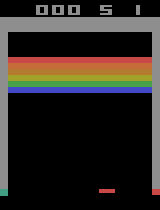

In [21]:
from PIL import Image
img = Image.fromarray(observation2)
display(img)

In [22]:
new_observation, reward, terminated, truncated, info = env2.step(1)

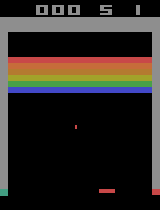

In [23]:
img2 = Image.fromarray(new_observation)
display(img2)

In [24]:
new_observation2, reward2, terminated2, truncated2, info2 = env2.step(3)

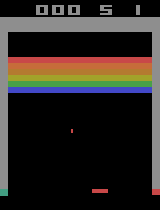

In [25]:
img3 = Image.fromarray(new_observation2)
display(img3)

In [26]:
new_observation3, reward3, terminated3, truncated3, info3 = env2.step(3)

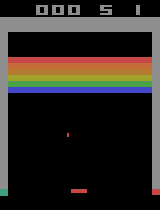

In [27]:
img3 = Image.fromarray(new_observation3)
display(img3)

## Make a custom environment
We can make a custom environment. It must contain "step", "reset" methods and observation_space, action_space

1. "step" method

    - Input : (valid) action
    
    - Output : ((valid) observation, reward, terminated, truncated, info)
    
2. "reset" method

    - Input : seed, options
    
    - Output : ((valid) observation, info)
    
3. observation_space, action_space

    - It must be gym.spaces type (For example, Discrete(4) or Box etc.)


Following code makes define simple GridWorld environment

In [28]:
import gym
from gym import spaces
import numpy as np


class GridWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None, size=5):
        self.size = size  # The size of the square grid
        self.window_size = 512  # The size of the PyGame window

        # Observations are dictionaries with the agent's and the target's location.
        # Each location is encoded as an element of {0, ..., `size`}^2, i.e. MultiDiscrete([size, size]).
        self.observation_space = spaces.Dict(
            {
                "agent": spaces.Box(0, size - 1, shape=(2,), dtype=int),
                "target": spaces.Box(0, size - 1, shape=(2,), dtype=int),
            }
        )

        # We have 4 actions, corresponding to "right", "up", "left", "down"
        self.action_space = spaces.Discrete(4)

        """
        The following dictionary maps abstract actions from `self.action_space` to 
        the direction we will walk in if that action is taken.
        I.e. 0 corresponds to "right", 1 to "up" etc.
        """
        self._action_to_direction = {
            0: np.array([1, 0]),  # right
            1: np.array([0, 1]),  # up
            2: np.array([-1, 0]), # left
            3: np.array([0, -1]), # down
        }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        """
        If human-rendering is used, `self.window` will be a reference
        to the window that we draw to. `self.clock` will be a clock that is used
        to ensure that the environment is rendered at the correct framerate in
        human-mode. They will remain `None` until human-mode is used for the
        first time.
        """
        self.window = None
        self.clock = None
        
    def _get_obs(self):
        return {"agent": self._agent_location, "target": self._target_location}
    
    def _get_info(self):
        return {"distance": np.linalg.norm(self._agent_location - self._target_location, ord=1)}
    
    def reset(self, seed=None, options=None):
        # We need the following line to seed self.np_random
        super().reset(seed=seed)

        # Choose the agent's location uniformly at random
        self._agent_location = self.np_random.integers(0, self.size, size=2, dtype=int)

        # We will sample the target's location randomly until it does not coincide with the agent's location
        self._target_location = self._agent_location
        while np.array_equal(self._target_location, self._agent_location):
            self._target_location = self.np_random.integers(
                0, self.size, size=2, dtype=int
            )

        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, info
    
    def step(self, action):
        # Map the action (element of {0,1,2,3}) to the direction we walk in
        direction = self._action_to_direction[action]
        # We use `np.clip` to make sure we don't leave the grid
        self._agent_location = np.clip(
            self._agent_location + direction, 0, self.size - 1
        )
        # An episode is done iff the agent has reached the target
        terminated = np.array_equal(self._agent_location, self._target_location)
        reward = 1 if terminated else 0  # Binary sparse rewards
        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, reward, terminated, False, info # truncated is False

### Confirm your custom environment is well-defined
We need to check whether custom environment is well-defined. We can check it by "gym.utils.env_checker.check_env".

If a custom environment is well-defined, it won't print anything. However, it will print an error message if a custom environment isn't well-defined.

In [29]:
from gym.utils.env_checker import check_env
custom_env = GridWorldEnv()

In [30]:
check_env(custom_env) # well-maed

/opt/anaconda3/envs/mathdrl/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [31]:
# This class has no "step" method so that this class isn't well-defined
class GridWorldEnv2(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None, size=5):
        self.size = size  # The size of the square grid
        self.window_size = 512  # The size of the PyGame window

        # Observations are dictionaries with the agent's and the target's location.
        # Each location is encoded as an element of {0, ..., `size`}^2, i.e. MultiDiscrete([size, size]).
        self.observation_space = spaces.Dict(
            {
                "agent": spaces.Box(0, size - 1, shape=(2,), dtype=int),
                "target": spaces.Box(0, size - 1, shape=(2,), dtype=int),
            }
        )

        # We have 4 actions, corresponding to "right", "up", "left", "down"
        self.action_space = spaces.Discrete(4)

        """
        The following dictionary maps abstract actions from `self.action_space` to 
        the direction we will walk in if that action is taken.
        I.e. 0 corresponds to "right", 1 to "up" etc.
        """
        self._action_to_direction = {
            0: np.array([1, 0]),
            1: np.array([0, 1]),
            2: np.array([-1, 0]),
            3: np.array([0, -1]),
        }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        """
        If human-rendering is used, `self.window` will be a reference
        to the window that we draw to. `self.clock` will be a clock that is used
        to ensure that the environment is rendered at the correct framerate in
        human-mode. They will remain `None` until human-mode is used for the
        first time.
        """
        self.window = None
        self.clock = None
        
    def _get_obs(self):
        return {"agent": self._agent_location, "target": self._target_location}
    
    def _get_info(self):
        return {"distance": np.linalg.norm(self._agent_location - self._target_location, ord=1)}
    
    def reset(self, seed=None, options=None):
        # We need the following line to seed self.np_random
        super().reset(seed=seed)

        # Choose the agent's location uniformly at random
        self._agent_location = self.np_random.integers(0, self.size, size=2, dtype=int)

        # We will sample the target's location randomly until it does not coincide with the agent's location
        self._target_location = self._agent_location
        while np.array_equal(self._target_location, self._agent_location):
            self._target_location = self.np_random.integers(
                0, self.size, size=2, dtype=int
            )

        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, info

In [32]:
custom_env2 = GridWorldEnv2()

In [33]:
check_env(custom_env2) # Not well-made

NotImplementedError: 